# **Prediksi Suara**

## **Business Understanding**

### Latar Belakang Masalah

Dalam banyak aplikasi berbasis suara — seperti sistem otomatis, voice command, atau sistem kontrol tanpa sentuhan — kemampuan untuk mengenali perintah suara secara akurat menjadi sangat penting.

Dalam proyek ini, dilakukan pengenalan dua jenis perintah suara yaitu “buka” dan “tutup”, yang dapat diaplikasikan misalnya untuk:

- engendalikan pintu otomatis, lampu, atau perangkat IoT;

- Sistem keamanan berbasis perintah suara;

- Aplikasi asisten virtual sederhana dengan dua aksi utama.

Namun, agar sistem dapat mengenali suara dengan baik, dibutuhkan data suara yang cukup banyak dan bervariasi. Jumlah data yang terbatas (misalnya hanya beberapa puluh rekaman) bisa menyebabkan model machine learning sulit belajar pola suara dengan baik. Karena itu, dilakukan proses augmentasi data suara untuk memperbanyak variasi dan meningkatkan kinerja model klasifikasi.

### Tujuan Proyek

Tujuan utama dari proyek ini adalah:

1. Membangun model klasifikasi suara sederhana yang dapat membedakan antara kata “buka” dan “tutup”.

2. Meningkatkan jumlah dan kualitas dataset suara dengan teknik data augmentation.

3. Mengekstraksi fitur-fitur audio menggunakan library TSFEL (Time Series Feature Extraction Library).

4. Melatih dan menguji model machine learning untuk pengenalan kata berbasis fitur suara.

5. Mendeploy model ke aplikasi Streamlit agar dapat digunakan secara interaktif melalui fitur rekam suara langsung.

## **Data Understanding**

### Sumber dan Bentuk Data

Dataset yang digunakan dalam proyek ini berasal dari hasil rekaman suara sendiri menggunakan mikrofon (melalui aplikasi perekam suara).
Setiap rekaman berisi satu kata saja, yaitu:

- Kelas 1: kata “buka”

- Kelas 2: kata “tutup”

In [2]:
import os
import pandas as pd

# Folder dataset asli
base_dir = "dataset"

# Daftar kelas (subfolder)
classes = ["buka", "tutup"]

# List untuk menyimpan info
data_info = []

# Loop setiap kelas
for cls in classes:
    folder_path = os.path.join(base_dir, cls)
    files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.wav', '.m4a'))]
    
    print(f"🎙️ Kelas '{cls}' memiliki {len(files)} file suara.")
    
    # Simpan info ke list
    for file in files:
        file_path = os.path.join(folder_path, file)
        data_info.append({
            "kelas": cls,
            "nama_file": file,
            "path": file_path
        })

# Buat DataFrame ringkasan
df_awal = pd.DataFrame(data_info)

# Tampilkan 10 data teratas
print("\n🔎 Contoh Data Awal:")
display(df_awal.head(10))

# Jumlah total per kelas
print("\n📈 Distribusi Data Awal:")
print(df_awal["kelas"].value_counts())


🎙️ Kelas 'buka' memiliki 35 file suara.
🎙️ Kelas 'tutup' memiliki 35 file suara.

🔎 Contoh Data Awal:


,kelas,nama_file,path
0,buka,Buka1.m4a,dataset\buka\Buka1.m4a
1,buka,buka1.wav,dataset\buka\buka1.wav
2,buka,Buka10.m4a,dataset\buka\Buka10.m4a
3,buka,buka10.wav,dataset\buka\buka10.wav
4,buka,Buka11.m4a,dataset\buka\Buka11.m4a
5,buka,Buka12.m4a,dataset\buka\Buka12.m4a
6,buka,Buka13.m4a,dataset\buka\Buka13.m4a
7,buka,Buka14.m4a,dataset\buka\Buka14.m4a
8,buka,Buka15.m4a,dataset\buka\Buka15.m4a
9,buka,Buka2.m4a,dataset\buka\Buka2.m4a



📈 Distribusi Data Awal:
kelas
buka     35
tutup    35
Name: count, dtype: int64


Berdasarkan hasil pemeriksaan direktori dataset, diperoleh dua kelas utama yaitu “buka” dan “tutup”.
Masing-masing kelas berisi 35 file suara, sehingga total data awal yang tersedia adalah 70 file audio.

### Analisis Awal (Exploratory Audio Analysis)

Langkah ini bertujuan untuk memahami karakteristik dasar data suara sebelum dilakukan ekstraksi fitur dan pelatihan model.
Analisis ini membantu untuk mengetahui apakah data antar kelas (“buka” dan “tutup”) memiliki pola yang dapat dibedakan dari sisi:

- Bentuk gelombang (waveform)

- Pola frekuensi (spektrogram)

- Durasi rekaman

C:\Users\Pras\AppData\Local\Temp\ipykernel_11656\400761997.py:13: UserWarning: PySoundFile failed. Trying audioread instead.
  y_buka, sr_buka = librosa.load(file_buka, sr=None)
C:\Users\Pras\AppData\Local\Temp\ipykernel_11656\400761997.py:14: UserWarning: PySoundFile failed. Trying audioread instead.
  y_tutup, sr_tutup = librosa.load(file_tutup, sr=None)
c:\Users\Pras\miniconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Contoh file 'buka': dataset\buka\Buka1.m4a (durasi: 1.62 detik)
Contoh file 'tutup': dataset\tutup\Tutup1.m4a (durasi: 1.34 detik)


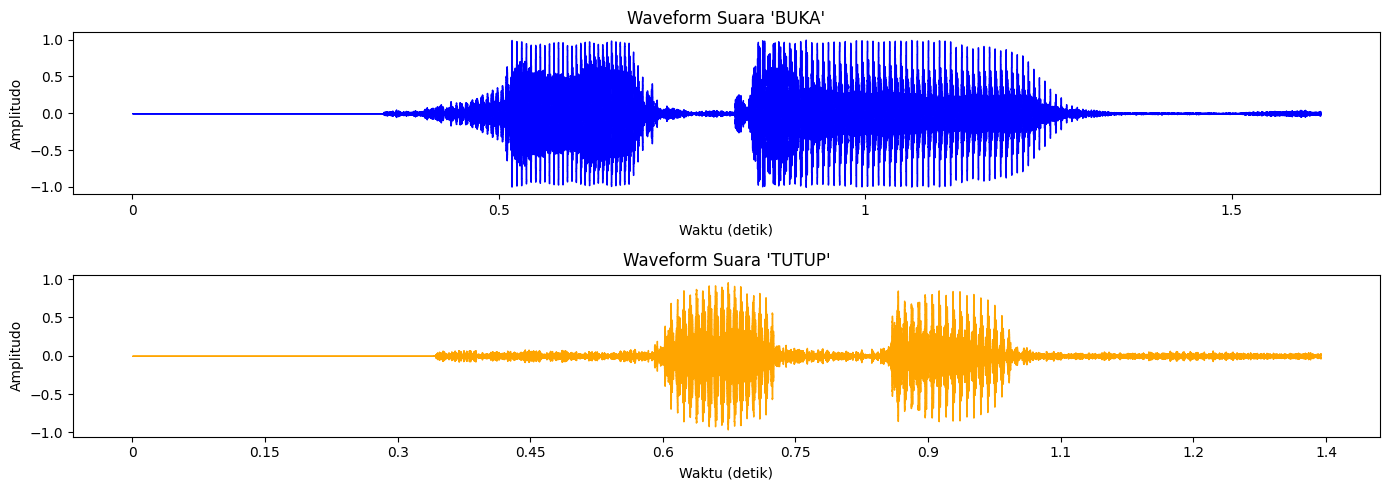

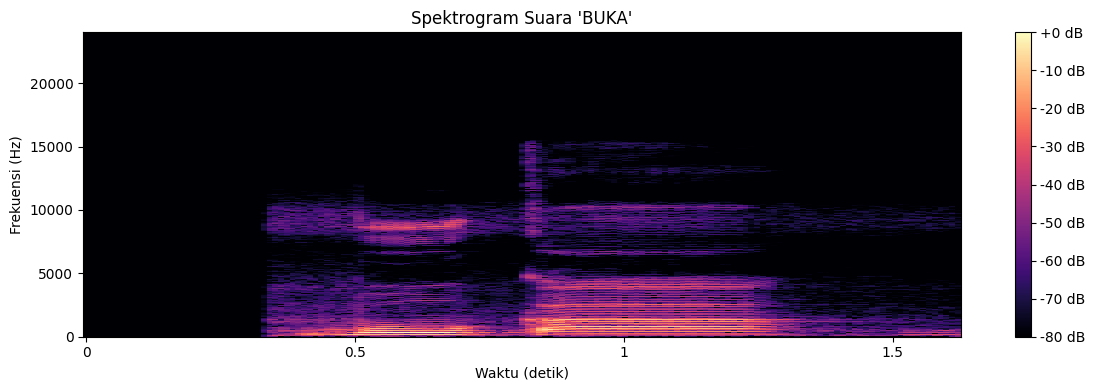

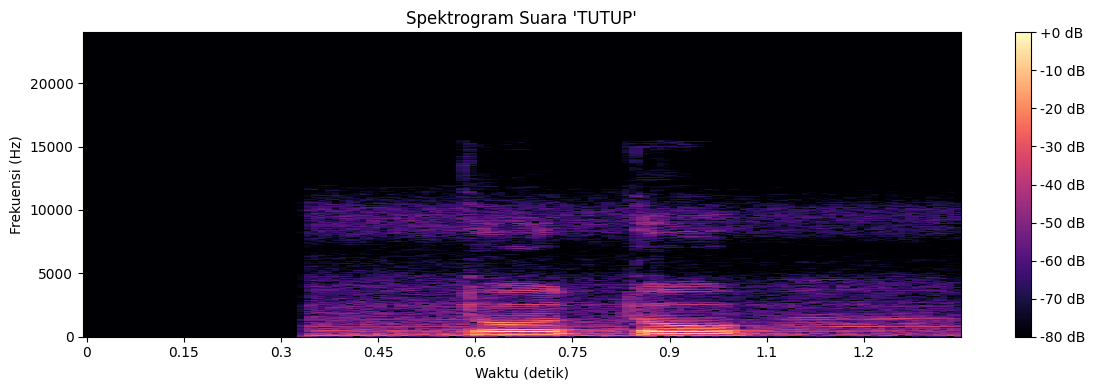

C:\Users\Pras\AppData\Local\Temp\ipykernel_11656\400761997.py:61: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(path, sr=None)


<Figure size 800x500 with 0 Axes>

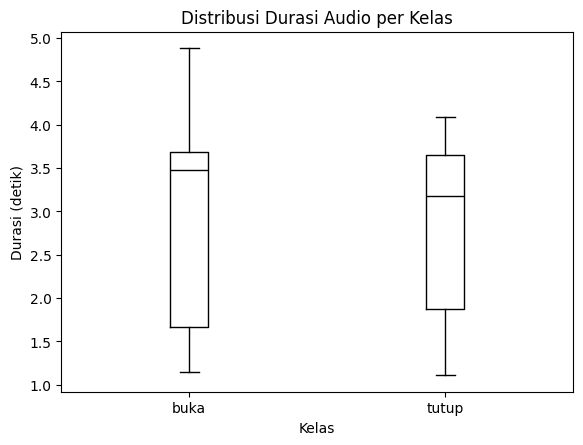

       count      mean       std       min       25%       50%       75%  \
Kelas                                                                      
buka    35.0  2.839329  1.117645  1.152000  1.664000  3.480000  3.685698   
tutup   35.0  2.810374  0.951250  1.109333  1.877333  3.178667  3.648000   

            max  
Kelas            
buka   4.885333  
tutup  4.095604  


In [ ]:
# --- CELL: Exploratory Audio Analysis ---
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Path contoh file untuk masing-masing kelas
file_buka = os.path.join("dataset", "buka", os.listdir("dataset/buka")[0])
file_tutup = os.path.join("dataset", "tutup", os.listdir("dataset/tutup")[0])

# --- LOAD AUDIO ---
y_buka, sr_buka = librosa.load(file_buka, sr=None)
y_tutup, sr_tutup = librosa.load(file_tutup, sr=None)

print(f"Contoh file 'buka': {file_buka} (durasi: {len(y_buka)/sr_buka:.2f} detik)")
print(f"Contoh file 'tutup': {file_tutup} (durasi: {len(y_tutup)/sr_tutup:.2f} detik)")

# --- PLOT WAVEFORM ---
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(y_buka, sr=sr_buka, color='blue')
plt.title("Waveform Suara 'BUKA'")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")

plt.subplot(2, 1, 2)
librosa.display.waveshow(y_tutup, sr=sr_tutup, color='orange')
plt.title("Waveform Suara 'TUTUP'")
plt.xlabel("Waktu (detik)")
plt.ylabel("Amplitudo")

plt.tight_layout()
plt.show()

# --- PLOT SPEKTROGRAM ---
def plot_spectrogram(y, sr, title):
    D = np.abs(librosa.stft(y))
    DB = librosa.amplitude_to_db(D, ref=np.max)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='hz', cmap='magma')
    plt.colorbar(format="%+2.0f dB")
    plt.title(title)
    plt.xlabel("Waktu (detik)")
    plt.ylabel("Frekuensi (Hz)")
    plt.tight_layout()
    plt.show()

plot_spectrogram(y_buka, sr_buka, "Spektrogram Suara 'BUKA'")
plot_spectrogram(y_tutup, sr_tutup, "Spektrogram Suara 'TUTUP'")

# --- DISTRIBUSI DURASI AUDIO PER KELAS ---
durasi_data = []

for kelas in ["buka", "tutup"]:
    folder = os.path.join("dataset", kelas)
    for file in os.listdir(folder):
        if file.endswith(('.wav', '.m4a')):
            path = os.path.join(folder, file)
            try:
                y, sr = librosa.load(path, sr=None)
                durasi = len(y) / sr
                durasi_data.append((kelas, durasi))
            except:
                pass

import pandas as pd
df_durasi = pd.DataFrame(durasi_data, columns=["Kelas", "Durasi"])

plt.figure(figsize=(8, 5))
df_durasi.boxplot(column="Durasi", by="Kelas", grid=False, color="black")
plt.title("Distribusi Durasi Audio per Kelas")
plt.suptitle("")  # Hilangkan judul default
plt.xlabel("Kelas")
plt.ylabel("Durasi (detik)")
plt.show()

print(df_durasi.groupby("Kelas")["Durasi"].describe())


## **Preprocessing**

### Augmentasi Data

In [ ]:
!pip install pydub ffmpeg-python

#### Import Library

In [ ]:
import os
import random
import numpy as np
import pandas as pd
import librosa
import soundfile as sf
from pydub import AudioSegment
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Gain


#### Pengaturan Folder Dataset

menyiapkan struktur penyimpanan untuk hasil augmentasi yang akan dihasilkan.

In [ ]:
base_dir = "dataset"                     # folder asal dataset
output_dir = "dataset_augmented"         # folder hasil augmentasi
target_samples = 100                     # target minimal per kelas

# Pastikan folder output ada
os.makedirs(output_dir, exist_ok=True)



#### Definisi Jenis Augmentasi

Tujuan: menambah variasi data suara sehingga model lebih kuat terhadap perbedaan kondisi lingkungan dan intonasi.

In [29]:
# --- CELL 3: Definisi augmentasi ---
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-3, max_semitones=3, p=0.5),
    Gain(min_gain_db=-6, max_gain_db=6, p=0.5)
])

#### Fungsi augment_audio_class()

Fungsi ini dibuat untuk memperbanyak data audio per kelas dengan menggunakan berbagai teknik augmentasi sehingga jumlah file mencapai target_samples (misal 100 file per kelas).

In [30]:
# --- CELL 4: Fungsi augmentasi per kelas ---
def augment_audio_class(folder_name):
    """
    folder_name: nama subfolder (misal 'buka' atau 'tutup')
    """
    src_folder = os.path.join(base_dir, folder_name)
    dst_folder = os.path.join(output_dir, folder_name)

    # Buat folder output jika belum ada
    os.makedirs(dst_folder, exist_ok=True)

    # Ambil daftar file
    files = [f for f in os.listdir(src_folder) if f.lower().endswith(('.wav', '.m4a'))]
    print(f"🎧 {folder_name}: {len(files)} file asli ditemukan")

    counter = 0
    # Lakukan augmentasi sampai total file mencapai target
    while len(os.listdir(dst_folder)) < target_samples:
        file = random.choice(files)
        path = os.path.join(src_folder, file)

        try:
            # === Load file ===
            if file.lower().endswith(".m4a"):
                audio = AudioSegment.from_file(path, format="m4a")
                signal = np.array(audio.get_array_of_samples()).astype(np.float32)
                signal = signal / np.iinfo(audio.array_type).max  # normalisasi -1..1
                sr = audio.frame_rate
            else:
                signal, sr = librosa.load(path, sr=None)

            # === Augmentasi ===
            augmented = augment(samples=signal, sample_rate=sr)

            # === Simpan hasil ===
            out_name = f"aug_{counter}_{os.path.splitext(file)[0]}.wav"
            out_path = os.path.join(dst_folder, out_name)
            sf.write(out_path, augmented, sr)
            counter += 1

            print(f"  ✅ {out_name} disimpan ({len(os.listdir(dst_folder))}/{target_samples})", end="\r")

        except Exception as e:
            print(f"⚠️ Gagal augmentasi {file}: {e}")

    print(f"\n➡️ Total file di {dst_folder}: {len(os.listdir(dst_folder))}")


In [31]:
# --- CELL 5: Jalankan augmentasi untuk kedua kelas ---
augment_audio_class("buka")
augment_audio_class("tutup")

print("\n✨ Augmentasi selesai! Hasil tersimpan di folder:", output_dir)

🎧 buka: 35 file asli ditemukan

➡️ Total file di dataset_augmented\buka: 100
🎧 tutup: 35 file asli ditemukan

➡️ Total file di dataset_augmented\tutup: 100

✨ Augmentasi selesai! Hasil tersimpan di folder: dataset_augmented


### Ekstraksi Fitur (MFCC)

Fungsi extract_features() membaca setiap file audio di folder tertentu, mengekstrak 13 koefisien MFCC, menghitung rata-ratanya, dan menambahkan label kelas sehingga setiap file direpresentasikan sebagai satu baris fitur numerik.

Fitur dari kelas “buka” dan “tutup” digabung menjadi satu DataFrame dengan kolom mfcc_1 sampai mfcc_13 dan label, lalu disimpan ke file fitur_audio.csv untuk digunakan pada training model.

In [32]:
def extract_features(folder, label):
    features = []
    for file in os.listdir(folder):
        if file.endswith((".wav", ".m4a")):
            path = os.path.join(folder, file)
            signal, sr = librosa.load(path, sr=None)
            mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
            mfcc_mean = np.mean(mfcc.T, axis=0)
            features.append([*mfcc_mean, label])
    return features


# --- Ekstraksi untuk kedua kelas ---
buka_features = extract_features("dataset_augmented/buka", "buka")
tutup_features = extract_features("dataset_augmented/tutup", "tutup")

# --- Gabungkan ke DataFrame ---
all_features = buka_features + tutup_features
columns = [f"mfcc_{i+1}" for i in range(13)] + ["label"]
df = pd.DataFrame(all_features, columns=columns)

# Simpan ke CSV untuk dipakai training
df.to_csv("fitur_audio.csv", index=False)
print("✅ Ekstraksi selesai, file tersimpan: fitur_audio.csv")

✅ Ekstraksi selesai, file tersimpan: fitur_audio.csv


## **Modeling dan Evaluasi**

### Split Data & Training Model

Dataset fitur dibagi menjadi data training (80%) dan testing (20%) dengan stratifikasi label untuk menjaga keseimbangan kelas.

Model Random Forest dibuat dengan 100 pohon keputusan dan dilatih menggunakan data training untuk mempelajari pola dari fitur MFCC.

Model yang sudah dilatih diuji pada data testing, lalu performanya dievaluasi menggunakan confusion matrix dan classification report yang menampilkan akurasi, precision, recall, dan F1-score.

In [33]:
# --- Training Model ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Baca fitur
data = pd.read_csv("fitur_audio.csv")

X = data.drop("label", axis=1)
y = data["label"]

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Buat model dan latih
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# --- Evaluasi Model ---
y_pred = model.predict(X_test)
print("\n📊 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred))



📊 Confusion Matrix:
[[19  1]
 [ 0 20]]

📈 Classification Report:
              precision    recall  f1-score   support

        buka       1.00      0.95      0.97        20
       tutup       0.95      1.00      0.98        20

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



## **Deployment**

### Simpan Model

Model Random Forest yang telah dilatih disimpan ke file model_randomforest.pkl menggunakan joblib agar bisa digunakan di tahap deploy.

In [ ]:
import joblib

# Simpan model
joblib.dump(model, "model/model_randomforest.pkl")
print("✅ Model disimpan ke file: model/model_randomforest.pkl")


✅ Model disimpan ke file: model/model_randomforest.pkl


Fungsi predict_audio() membaca file audio baru (baik .wav maupun .m4a), mengekstrak fitur MFCC rata-rata, lalu menggunakan model Random Forest yang sudah dilatih untuk memprediksi apakah audio tersebut termasuk kelas “buka” atau “tutup” dan menampilkan hasil prediksinya.

In [35]:
def predict_audio(file_path, model):
    """
    Memprediksi apakah file audio termasuk 'buka' atau 'tutup'
    """
    if not os.path.exists(file_path):
        print(f"❌ File tidak ditemukan: {file_path}")
        return
    
    try:
        # --- Gunakan pydub jika format m4a ---
        if file_path.endswith(".m4a"):
            audio = AudioSegment.from_file(file_path, format="m4a")
            signal = np.array(audio.get_array_of_samples()).astype(np.float32)
            signal = signal / np.iinfo(audio.array_type).max
            sr = audio.frame_rate
        else:
            signal, sr = librosa.load(file_path, sr=None)

        # --- Ekstraksi MFCC ---
        mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
        mfcc_mean = np.mean(mfcc.T, axis=0).reshape(1, -1)

        # --- Prediksi ---
        pred = model.predict(mfcc_mean)[0]
        print(f"🎤 Prediksi untuk '{os.path.basename(file_path)}' → {pred}")

    except Exception as e:
        print(f"⚠️ Gagal memproses file {file_path}: {e}")


In [38]:
predict_audio("dataset/buka/Buka1.m4a", model)
predict_audio("dataset/tutup/tutup1.wav", model)


🎤 Prediksi untuk 'Buka1.m4a' → buka
🎤 Prediksi untuk 'tutup1.wav' → tutup


c:\Users\Pras\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Pras\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Code untuk melihat website bisa diakses melalui link : https://github.com/Pras7804/prediksi_suara

Untuk websitenya dapat diakses melalui : https://prediksi-suara-230411100099.streamlit.app/